In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
%pip install ucimlrepo

**1. For each feature and the target variables, obtain the mean, standard deviation, min, max, and 25/50/75% percentiles. (Show a table.)**

In [4]:
White_CSV = '/content/winequality-white.csv'
pd_white = pd.read_csv(White_CSV , sep= ';')
pd_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**2. Illustrate the correlation matrix of all features and the target.**

In [14]:
corr = pd_white.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<Axes: >

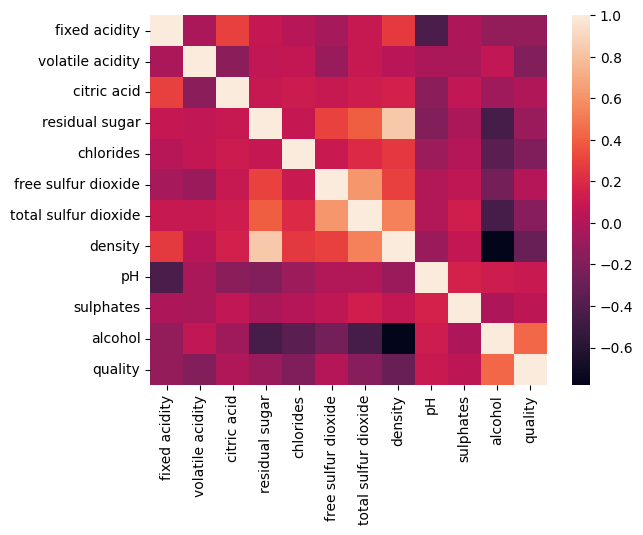

In [15]:
sns.heatmap(corr)

**3. Plot a histogram of the target value (quality)**

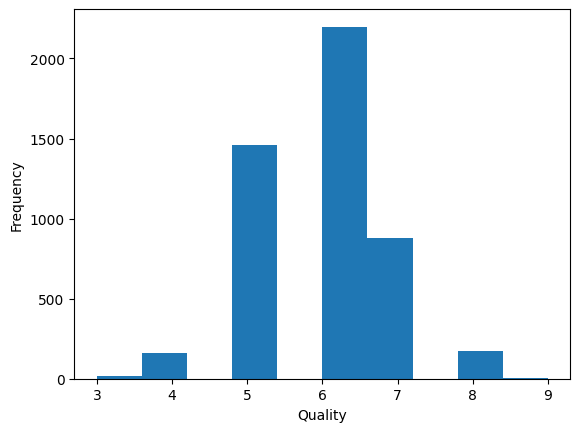

In [19]:
plt.hist(pd_white['quality'])
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

**4. Illustrate the violin plots of all features. Make sure that each plot is visible.**

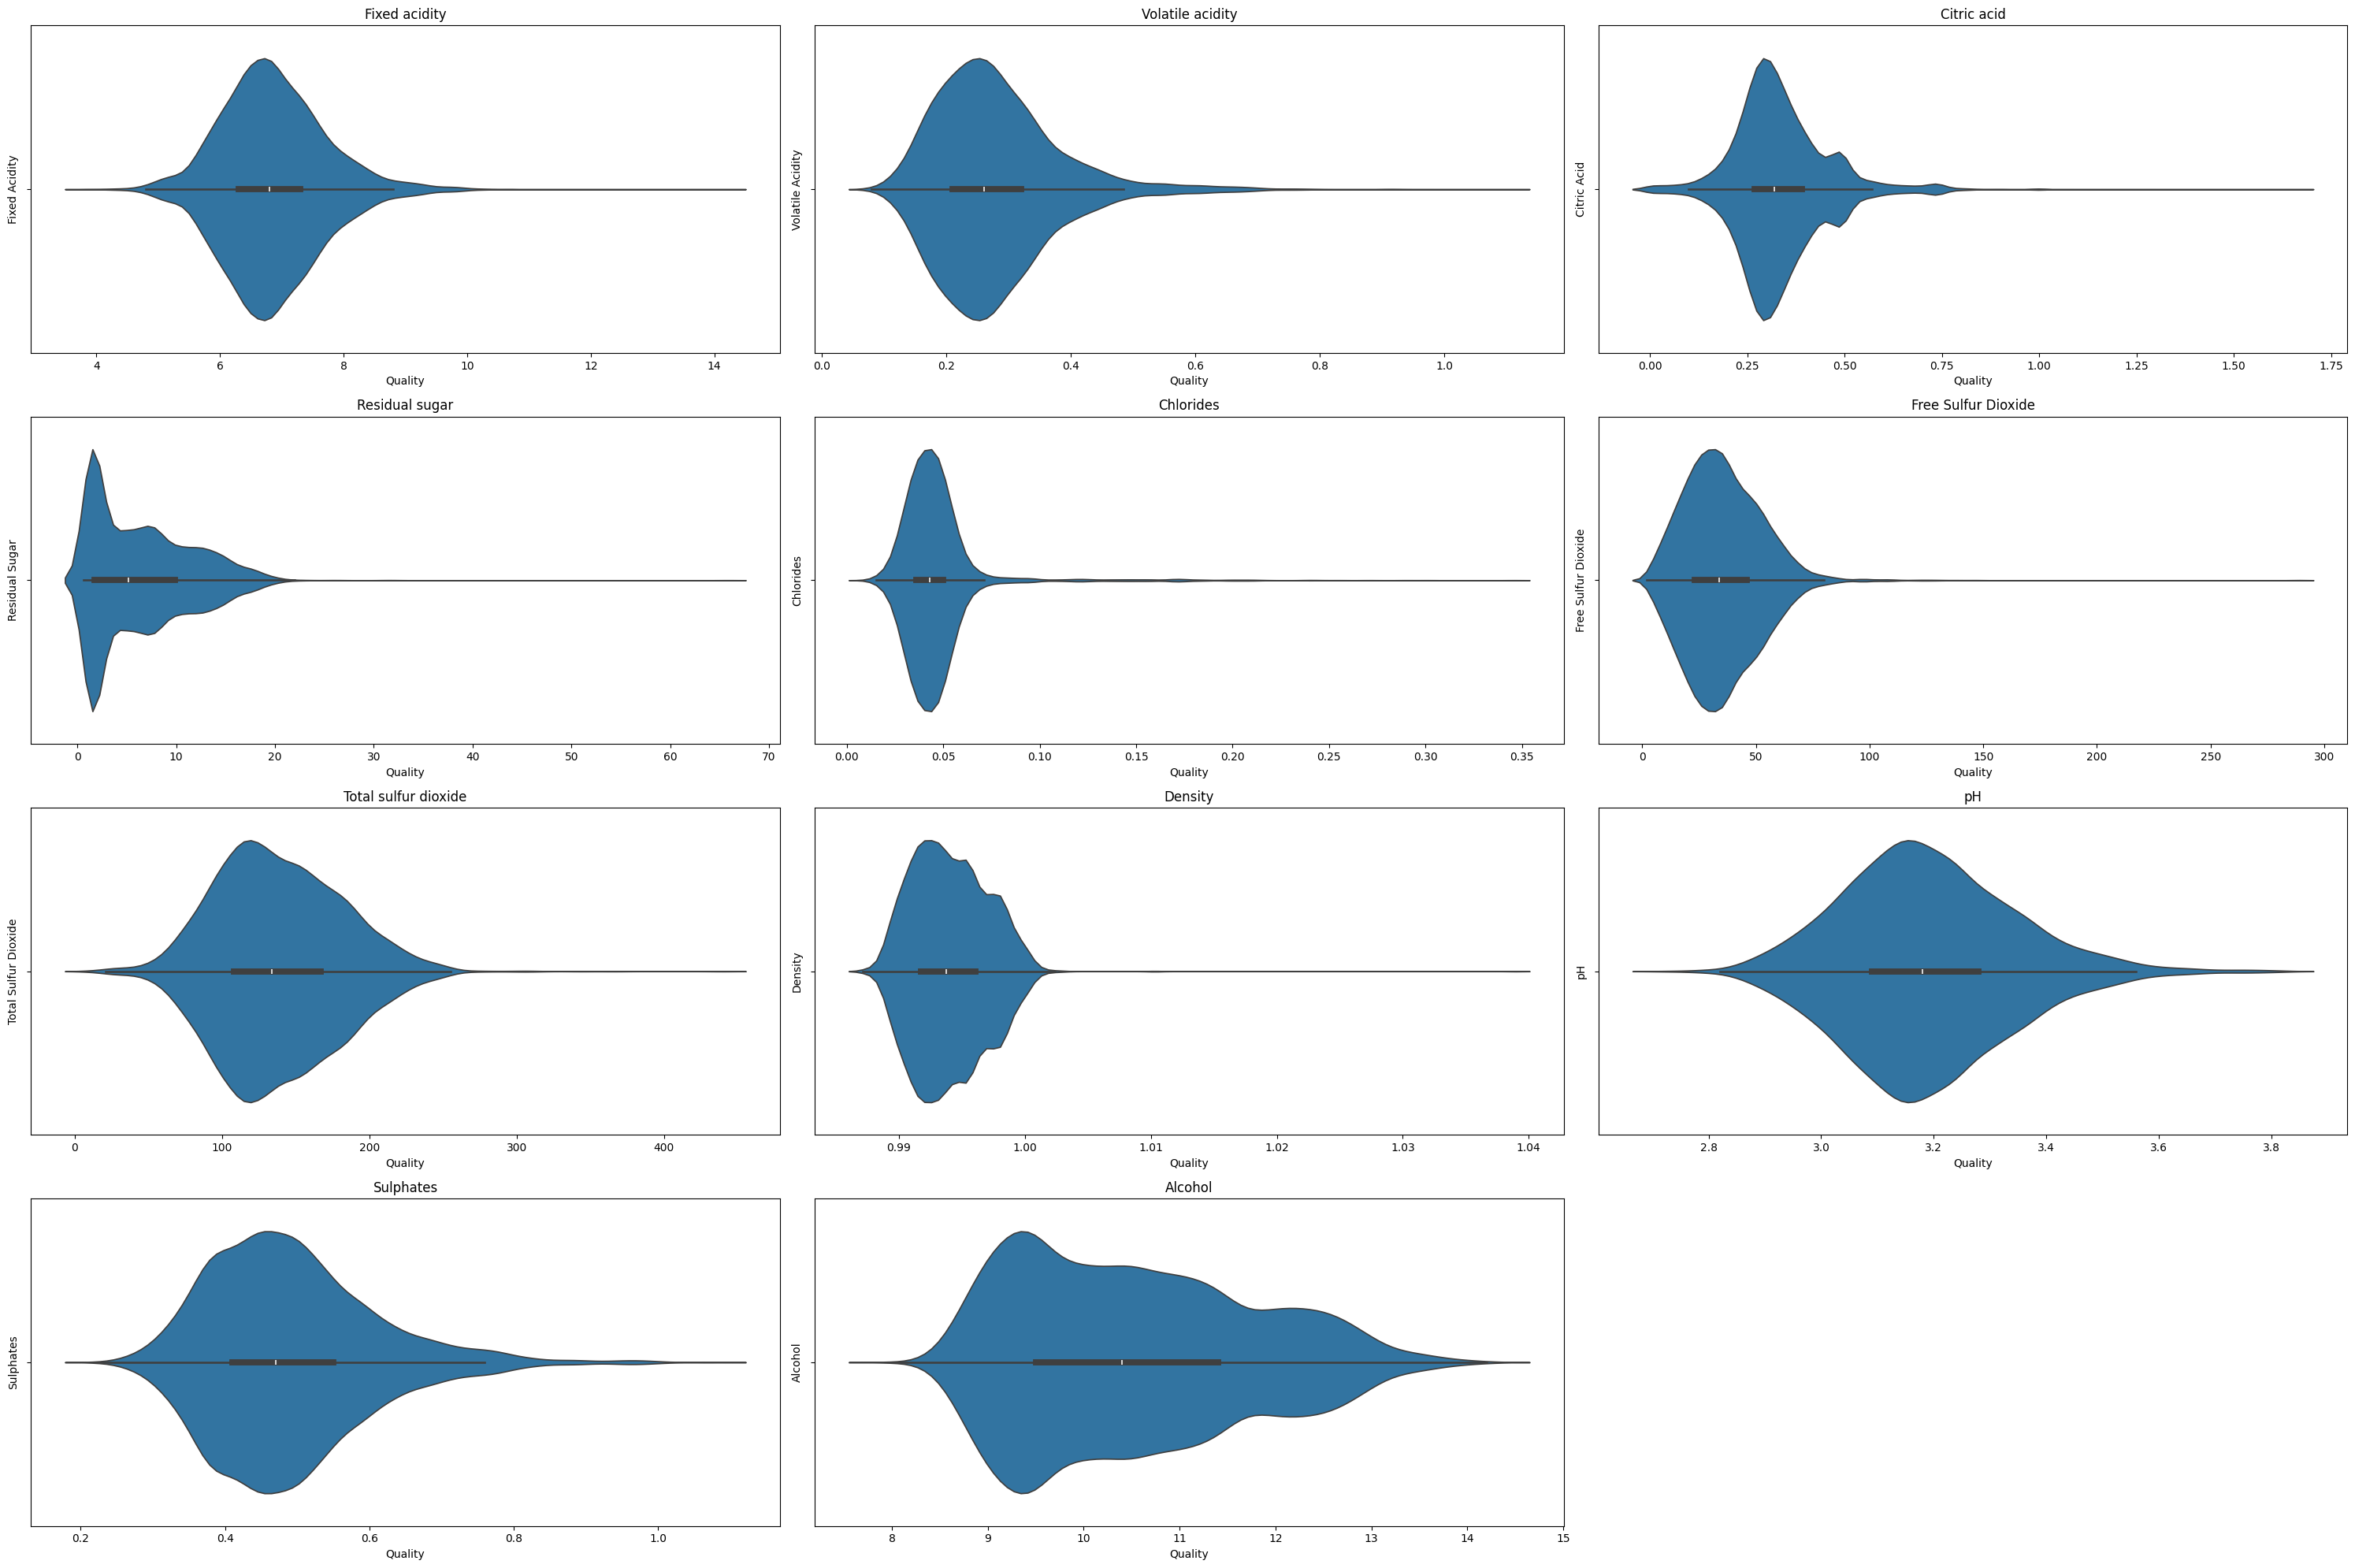

In [34]:
plt.figure(figsize=(30, 20))
plt.subplot(4, 3, 1)
sns.violinplot(data=pd_white, x='fixed acidity')
plt.title('Fixed acidity')
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')

plt.subplot(4, 3, 2)
sns.violinplot(data=pd_white, x='volatile acidity')
plt.title('Volatile acidity')
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')

plt.subplot(4, 3, 3)
sns.violinplot(data=pd_white, x='citric acid')
plt.title('Citric acid')
plt.xlabel('Quality')
plt.ylabel('Citric Acid')

plt.subplot(4, 3, 4)
sns.violinplot(data=pd_white, x='residual sugar')
plt.title('Residual sugar')
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')

plt.subplot(4, 3, 5)
sns.violinplot(data=pd_white, x='chlorides')
plt.title('Chlorides')
plt.xlabel('Quality')
plt.ylabel('Chlorides')

plt.subplot(4, 3, 6)
sns.violinplot(data=pd_white, x='free sulfur dioxide')
plt.title('Free Sulfur Dioxide')
plt.xlabel('Quality')
plt.ylabel('Free Sulfur Dioxide')

plt.subplot(4, 3, 7)
sns.violinplot(data=pd_white, x='total sulfur dioxide')
plt.title('Total sulfur dioxide')
plt.xlabel('Quality')
plt.ylabel('Total Sulfur Dioxide')

plt.subplot(4, 3, 8)
sns.violinplot(data=pd_white, x='density')
plt.title('Density')
plt.xlabel('Quality')
plt.ylabel('Density')

plt.subplot(4, 3, 9)
sns.violinplot(data=pd_white, x='pH')
plt.title('pH')
plt.xlabel('Quality')
plt.ylabel('pH')

plt.subplot(4, 3, 10)
sns.violinplot(data=pd_white, x='sulphates')
plt.title('Sulphates')
plt.xlabel('Quality')
plt.ylabel('Sulphates')

plt.subplot(4, 3, 11)
sns.violinplot(data=pd_white, x='alcohol')
plt.title('Alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')

plt.tight_layout()

**5. Train a linear regression model with a single input variable (alcohol). Plot all data points (x=alcohol; y=quality) and the obtained regression model. Show the intercept, coefficient, RMSE, and R^2.**

In [41]:
model = LinearRegression()
model.fit(pd_white[['alcohol']], pd_white['quality'])
fitted = model.predict(pd_white[['alcohol']])
RMSE = np.sqrt(mean_squared_error(pd_white['quality'], fitted))
r2 = r2_score(pd_white['quality'], fitted)
print(f'b0 = {model.intercept_}')
print(f'b1 = {model.coef_[0]}')
print(f'RMSE = {RMSE}')
print(f'r2 = {r2}')

b0 = 2.582009399174922
b1 = 0.3134693019118325
RMSE = 0.7971284628753889
r2 = 0.1897253327492563


**6. Train a linear regression model with input variables (volatile_acidity, alcohol, and density). Show the intercept, coefficient, RMSE, and R^2.**

In [53]:

x = ['volatile acidity', 'alcohol', 'density']
model = LinearRegression()
model.fit(pd_white[x], pd_white['quality'])
fitted_one = model.predict(pd_white[x])
RMSE_one = np.sqrt(mean_squared_error(pd_white['quality'], fitted))
r_one = r2_score(pd_white['quality'], fitted)
print(f'b0 = {model.intercept_}')
print(f'b1 = {model.coef_[0]}')
print(f'RMSE_one = {RMSE}')
print(f'r2_one = {r2}')

b0 = -36.498611307001624
b1 = -2.0721159353329517
RMSE_one = 0.7971284628753889
r2_one = 0.1897253327492563
